In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#text processing
import nltk
import string
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install --upgrade pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl --upgrade

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_excel('AI in Action_Negoisst-Training-Data.xlsx', index_col=0)
df

ReceiverID    ActionType  NegoOutcome  \
SenderID                                          
31                32         Offer  FinalAccept   
32                31  Counteroffer  FinalAccept   
31                32  Counteroffer  FinalAccept   
32                31  Counteroffer  FinalAccept   
31                32      Question  FinalAccept   
...              ...           ...          ...   
851              856  Counteroffer  FinalReject   
856              851  Counteroffer  FinalReject   
851              856  Counteroffer  FinalReject   
856              851  Counteroffer  FinalReject   
851              856   FinalReject  FinalReject   

                                                    Content  
SenderID                                                     
31        Hey Chris, Great that we are working together ...  
32        Hey Alex, The pleasure is all mine. For starte...  
31        Hey Chris,  Thank you for your response.  I am...  
32        Hello Alex, I think we have a solid compromis ...  
31        Dear Chris, I am glad to hear that you are wil...  
...                                                     ...  
851       Dear Chis Meyer,\n \nthank you for your latest...  
856       Dear Alex Kramer,\nthank you very much for you...  
851       Dear Chris Meyer,\nthank you for your fast ans...  
856       Dear Alex Kramer,\nI am still very interested ...  
851       Dear Chris Meyer,\n \nI'm so sorry but I can n...  

[2254 rows x 4 columns]

In [5]:
df.isnull().sum()

ReceiverID     0
ActionType     0
NegoOutcome    0
Content        0
dtype: int64

In [6]:
#Anzahl der Zeichen

df['Length'] = df['Content'].str.len()
df.head(10)

ReceiverID     ActionType  NegoOutcome  \
SenderID                                           
31                32          Offer  FinalAccept   
32                31   Counteroffer  FinalAccept   
31                32   Counteroffer  FinalAccept   
32                31   Counteroffer  FinalAccept   
31                32       Question  FinalAccept   
32                31  Clarification  FinalAccept   
31                32    FinalAccept  FinalAccept   
33                34          Offer  FinalAccept   
34                33   Counteroffer  FinalAccept   
33                34   Counteroffer  FinalAccept   

                                                    Content  Length  
SenderID                                                             
31        Hey Chris, Great that we are working together ...    1778  
32        Hey Alex, The pleasure is all mine. For starte...    1949  
31        Hey Chris,  Thank you for your response.  I am...     693  
32        Hello Alex, I think we have a solid compromis ...     452  
31        Dear Chris, I am glad to hear that you are wil...    1349  
32        Dear Alex, Thanks for elaborating. Let's pop t...     134  
31        Great! Hereby my official confirmation of the ...     113  
33        Dear Chris, Hopefully you are doing well. Ther...    2220  
34        Dear Alex, Thanks a lot for your message! I am...    2282  
33        Dear Chris, Good to hear that you are doing we...    2821

In [7]:
#WordCount

def word_count(content):
    content_list = content.split()
    return len(content_list)

df['Word count of nego message'] = df['Content'].apply(word_count)
df.head(10)

ReceiverID     ActionType  NegoOutcome  \
SenderID                                           
31                32          Offer  FinalAccept   
32                31   Counteroffer  FinalAccept   
31                32   Counteroffer  FinalAccept   
32                31   Counteroffer  FinalAccept   
31                32       Question  FinalAccept   
32                31  Clarification  FinalAccept   
31                32    FinalAccept  FinalAccept   
33                34          Offer  FinalAccept   
34                33   Counteroffer  FinalAccept   
33                34   Counteroffer  FinalAccept   

                                                    Content  Length  \
SenderID                                                              
31        Hey Chris, Great that we are working together ...    1778   
32        Hey Alex, The pleasure is all mine. For starte...    1949   
31        Hey Chris,  Thank you for your response.  I am...     693   
32        Hello Alex, I think we have a solid compromis ...     452   
31        Dear Chris, I am glad to hear that you are wil...    1349   
32        Dear Alex, Thanks for elaborating. Let's pop t...     134   
31        Great! Hereby my official confirmation of the ...     113   
33        Dear Chris, Hopefully you are doing well. Ther...    2220   
34        Dear Alex, Thanks a lot for your message! I am...    2282   
33        Dear Chris, Good to hear that you are doing we...    2821   

          Word count of nego message  
SenderID                              
31                               309  
32                               337  
31                               123  
32                                77  
31                               249  
32                                22  
31                                18  
33                               381  
34                               407  
33                               537

In [8]:
df['NegoOutcome'].value_counts()

NegoOutcome
FinalAccept    1795
FinalReject     459
Name: count, dtype: int64

In [9]:
accepted_messages = df[df['NegoOutcome']=='FinalAccept']['Content']
accepted_messages

SenderID
31      Hey Chris, Great that we are working together ...
32      Hey Alex, The pleasure is all mine. For starte...
31      Hey Chris,  Thank you for your response.  I am...
32      Hello Alex, I think we have a solid compromis ...
31      Dear Chris, I am glad to hear that you are wil...
                              ...                        
1151    Dear Chris Meyer,\nIm happy that you accepted ...
1156    Dr. Mr Kramer,\nthank you for your fast reply....
1151    Dear Mr.Chris Meyer,\nI understand your proble...
1156    Dear Mr. Kramer,\nI propose we think out of th...
1151    Dear Mr.Meyer,\nThank you for your last offer....
Name: Content, Length: 1795, dtype: object

In [10]:
accepted_messages.count()

1795

In [11]:
rejected_messages = df[df['NegoOutcome']=='FinalReject']['Content']
#rejected_messages.values[1]

In [12]:
rejected_messages.count()

459

In [13]:
df

ReceiverID    ActionType  NegoOutcome  \
SenderID                                          
31                32         Offer  FinalAccept   
32                31  Counteroffer  FinalAccept   
31                32  Counteroffer  FinalAccept   
32                31  Counteroffer  FinalAccept   
31                32      Question  FinalAccept   
...              ...           ...          ...   
851              856  Counteroffer  FinalReject   
856              851  Counteroffer  FinalReject   
851              856  Counteroffer  FinalReject   
856              851  Counteroffer  FinalReject   
851              856   FinalReject  FinalReject   

                                                    Content  Length  \
SenderID                                                              
31        Hey Chris, Great that we are working together ...    1778   
32        Hey Alex, The pleasure is all mine. For starte...    1949   
31        Hey Chris,  Thank you for your response.  I am...     693   
32        Hello Alex, I think we have a solid compromis ...     452   
31        Dear Chris, I am glad to hear that you are wil...    1349   
...                                                     ...     ...   
851       Dear Chis Meyer,\n \nthank you for your latest...    1755   
856       Dear Alex Kramer,\nthank you very much for you...    1460   
851       Dear Chris Meyer,\nthank you for your fast ans...     673   
856       Dear Alex Kramer,\nI am still very interested ...     969   
851       Dear Chris Meyer,\n \nI'm so sorry but I can n...     276   

          Word count of nego message  
SenderID                              
31                               309  
32                               337  
31                               123  
32                                77  
31                               249  
...                              ...  
851                              338  
856                              263  
851                              133  
856                              171  
851                               54  

[2254 rows x 6 columns]

In [14]:
from sklearn import preprocessing

df['NegoOutcomeLabel'] = df.NegoOutcome.map({'FinalReject':0, 'FinalAccept':1})
df.head()

ReceiverID    ActionType  NegoOutcome  \
SenderID                                          
31                32         Offer  FinalAccept   
32                31  Counteroffer  FinalAccept   
31                32  Counteroffer  FinalAccept   
32                31  Counteroffer  FinalAccept   
31                32      Question  FinalAccept   

                                                    Content  Length  \
SenderID                                                              
31        Hey Chris, Great that we are working together ...    1778   
32        Hey Alex, The pleasure is all mine. For starte...    1949   
31        Hey Chris,  Thank you for your response.  I am...     693   
32        Hello Alex, I think we have a solid compromis ...     452   
31        Dear Chris, I am glad to hear that you are wil...    1349   

          Word count of nego message  NegoOutcomeLabel  
SenderID                                                
31                               309                 1  
32                               337                 1  
31                               123                 1  
32                                77                 1  
31                               249                 1

In [15]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Rejected Messages')

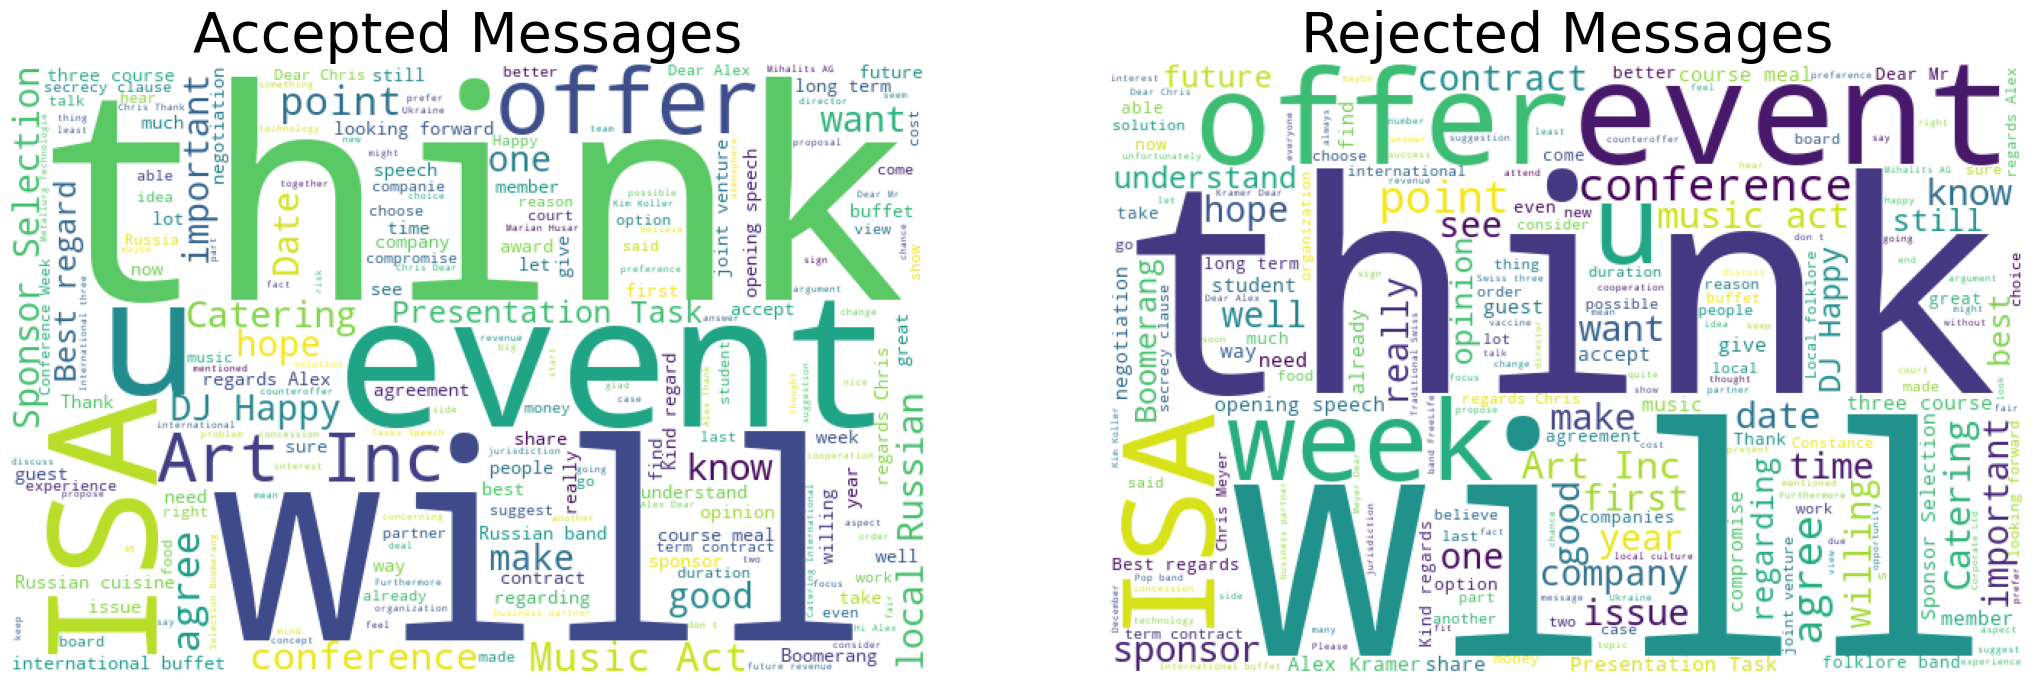

In [16]:
from wordcloud import WordCloud

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[26,8])

wordcloud1 = WordCloud(background_color='white', width=600, height=400).generate(" ".join(accepted_messages))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Accepted Messages', fontsize=40)

wordcloud2 = WordCloud(background_color='white', width=600, height=400).generate(" ".join(rejected_messages))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Rejected Messages', fontsize=40)

In [17]:
#Text processing

In [18]:
all_messages = df["Content"]
all_messages

SenderID
31     Hey Chris, Great that we are working together ...
32     Hey Alex, The pleasure is all mine. For starte...
31     Hey Chris,  Thank you for your response.  I am...
32     Hello Alex, I think we have a solid compromis ...
31     Dear Chris, I am glad to hear that you are wil...
                             ...                        
851    Dear Chis Meyer,\n \nthank you for your latest...
856    Dear Alex Kramer,\nthank you very much for you...
851    Dear Chris Meyer,\nthank you for your fast ans...
856    Dear Alex Kramer,\nI am still very interested ...
851    Dear Chris Meyer,\n \nI'm so sorry but I can n...
Name: Content, Length: 2254, dtype: object

In [19]:
def clean_text(message):
    #lowercasing
    message = message.lower()
    
    #regular expressions, gerne mal nachschauen wie das funktioniert
    message = re.sub('\[.*?\]', '', message)
    message = re.sub('https?://\S+|www\.\S+', '', message)
    message = re.sub('<.*?>+', '', message)
    message = re.sub('[%s]' % re.escape(string.punctuation), '', message)
    message = re.sub('\n', '', message)
    message = re.sub('\w*\d\w*', '', message)
    
    return message

In [20]:
df["Content"] = df["Content"].apply(lambda x: clean_text(x))
df["Content"].head()

SenderID
31    hey chris great that we are working together f...
32    hey alex the pleasure is all mine for starters...
31    hey chris  thank you for your response  i am g...
32    hello alex i think we have a solid compromis a...
31    dear chris i am glad to hear that you are will...
Name: Content, dtype: object

In [21]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+') #Token auf Frame-Ebene
df['Content'] = df['Content'].apply(lambda x: tokenizer.tokenize(x))
df['Content'].head()

SenderID
31    [hey, chris, great, that, we, are, working, to...
32    [hey, alex, the, pleasure, is, all, mine, for,...
31    [hey, chris, thank, you, for, your, response, ...
32    [hello, alex, i, think, we, have, a, solid, co...
31    [dear, chris, i, am, glad, to, hear, that, you...
Name: Content, dtype: object

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\4mein\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords

stopwords_en = stopwords.words('english')

print(stopwords_en)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
def remove_stopwords(text):
    words=[w for w in text if w not in stopwords.words('english')]
    return words

df['Content'] = df['Content'].apply(lambda x: remove_stopwords(x))
df['Content'].head()

SenderID
31    [hey, chris, great, working, together, competi...
32    [hey, alex, pleasure, mine, starters, think, i...
31    [hey, chris, thank, response, glad, hear, agre...
32    [hello, alex, think, solid, compromis, settled...
31    [dear, chris, glad, hear, willing, accept, ter...
Name: Content, dtype: object

In [25]:
text = "I am welcoming you all to the AI courses of the intelligent information systems chair"

tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)
tokens

['I',
 'am',
 'welcoming',
 'you',
 'all',
 'to',
 'the',
 'AI',
 'courses',
 'of',
 'the',
 'intelligent',
 'information',
 'systems',
 'chair']

In [26]:
stemmer = nltk.stem.PorterStemmer()
print("Stemming the sentence: ", " ".join(stemmer.stem(token) for token in tokens))

Stemming the sentence:  i am welcom you all to the ai cours of the intellig inform system chair


In [27]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\4mein\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
lemmatizer = nltk.stem.WordNetLemmatizer()
print("Lemmatizing the sentence: ", " ".join(lemmatizer.lemmatize(token) for token in tokens))

Lemmatizing the sentence:  I am welcoming you all to the AI course of the intelligent information system chair


In [29]:
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

df['Content'] = df['Content'].apply(lambda x: combine_text(x))
df['Content']

SenderID
31     hey chris great working together competition h...
32     hey alex pleasure mine starters think importan...
31     hey chris thank response glad hear agree date ...
32     hello alex think solid compromis settled willi...
31     dear chris glad hear willing accept terms come...
                             ...                        
851    dear chis meyer thank latest offer points comp...
856    dear alex kramerthank much latest offer happy ...
851    dear chris meyerthank fast answer happy found ...
856    dear alex krameri still interested coming join...
851    dear chris meyer im sorry accept less mei unde...
Name: Content, Length: 2254, dtype: object

In [30]:
df.head()

ReceiverID    ActionType  NegoOutcome  \
SenderID                                          
31                32         Offer  FinalAccept   
32                31  Counteroffer  FinalAccept   
31                32  Counteroffer  FinalAccept   
32                31  Counteroffer  FinalAccept   
31                32      Question  FinalAccept   

                                                    Content  Length  \
SenderID                                                              
31        hey chris great working together competition h...    1778   
32        hey alex pleasure mine starters think importan...    1949   
31        hey chris thank response glad hear agree date ...     693   
32        hello alex think solid compromis settled willi...     452   
31        dear chris glad hear willing accept terms come...    1349   

          Word count of nego message  NegoOutcomeLabel  
SenderID                                                
31                               309                 1  
32                               337                 1  
31                               123                 1  
32                                77                 1  
31                               249                 1

In [31]:
corpus=[]
new=df['Content'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
corpus

['hey',
 'chris',
 'great',
 'working',
 'together',
 'competition',
 'hereby',
 'first',
 'proposal',
 'negotiations',
 'catering',
 'suggest',
 'go',
 'international',
 'buffet',
 'order',
 'able',
 'network',
 'atmosphere',
 'relaxed',
 'easygoing',
 'opinion',
 'formal',
 'threecourse',
 'meal',
 'makes',
 'impossible',
 'furthermore',
 'since',
 'many',
 'people',
 'familiar',
 'russian',
 'cuisine',
 'suggest',
 'go',
 'international',
 'food',
 'order',
 'everyone',
 'find',
 'food',
 'like',
 'date',
 'conference',
 'suggest',
 'week',
 'first',
 'week',
 'conference',
 'colides',
 'international',
 'conference',
 'economics',
 'business',
 'management',
 'moscow',
 'second',
 'week',
 'isa',
 'higher',
 'ranked',
 'members',
 'unavailable',
 'week',
 'four',
 'would',
 'close',
 'christmas',
 'holiday',
 'last',
 'week',
 'christmas',
 'guess',
 'around',
 'christmas',
 'many',
 'people',
 'time',
 'go',
 'event',
 'week',
 'seem',
 'problems',
 'music',
 'act',
 'suggest',
 '

In [32]:
#barchart bauen charts auen mit der liste, wie oft wurde welches wort verwendet usw data exploration
#top word funktion machen auf basis barcharts 20 top words ausgeben lassen, - range von 400 bis 2000 und dann mit reject usw in verbindung bringen

In [33]:
len(corpus)

253418

In [34]:
#BoW

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
count_vectorizer  = CountVectorizer()
message_vector= count_vectorizer.fit_transform(df['Content'])
message_vector

<2254x11443 sparse matrix of type '<class 'numpy.int64'>'
	with 190283 stored elements in Compressed Sparse Row format>

In [37]:
message_array = message_vector.toarray()
df_countvectorizer = pd.DataFrame(data=message_array, columns=count_vectorizer.get_feature_names_out())
print(df_countvectorizer)

      aand  abandon  abandoning  abe  aber  abilities  ability  abillity  \
0        0        0           0    0     0          0        0         0   
1        0        0           0    0     0          0        0         0   
2        0        0           0    0     0          0        0         0   
3        0        0           0    0     0          0        0         0   
4        0        0           0    0     0          0        0         0   
...    ...      ...         ...  ...   ...        ...      ...       ...   
2249     0        0           0    0     0          0        0         0   
2250     0        0           0    0     0          0        0         0   
2251     0        0           0    0     0          0        0         0   
2252     0        0           0    0     0          0        0         0   
2253     0        0           0    0     0          0        0         0   

      abilty  able  ...  youyour  youyours  zealand  zero  zone  zurich  \
0          0

In [38]:
df_countvectorizer.columns

Index(['aand', 'abandon', 'abandoning', 'abe', 'aber', 'abilities', 'ability',
       'abillity', 'abilty', 'able',
       ...
       'youyour', 'youyours', 'zealand', 'zero', 'zone', 'zurich', 'zurick',
       'zvrzahl', 'zürich', 'ánd'],
      dtype='object', length=11443)

In [39]:
count_vectorizer_ngrams = CountVectorizer(ngram_range=(1,2), min_df=0.01, max_df=0.7, max_features=100)
message_vecotrs_ngrams=count_vectorizer_ngrams.fit_transform(df['Content'])

In [40]:
message_vecotrs_ngrams.shape

(2254, 100)

In [41]:
message_ngrams_array = message_vecotrs_ngrams.toarray()
df_countvectorizer_ngrams = pd.DataFrame(data=message_ngrams_array, columns=count_vectorizer_ngrams.get_feature_names_out())
print(df_countvectorizer_ngrams)

      accept  act  agree  alex  already  also  art  art inc  band  best  ...  \
0          0    3      0     2        0     1    2        2     0     1  ...   
1          0    3      1     2        0     1    2        2     0     0  ...   
2          1    2      2     2        0     0    3        3     0     0  ...   
3          1    1      0     2        0     0    2        2     0     1  ...   
4          1    0      0     1        0     1    6        6     0     1  ...   
...      ...  ...    ...   ...      ...   ...  ...      ...   ...   ...  ...   
2249       0    1      0     0        0     3    0        0     3     2  ...   
2250       1    2      1     1        1     0    0        0     3     0  ...   
2251       0    2      0     0        1     0    0        0     2     1  ...   
2252       3    1      0     1        1     0    0        0     1     1  ...   
2253       1    0      0     0        0     0    0        0     0     1  ...   

      understand  us  want  way  week  

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(df['Content'])
tfidf_message_vector = tfidf_vectorizer.transform(df['Content'])

In [44]:
tfidf_message_vector.shape

(2254, 11443)

In [45]:
message_tfidf_array = tfidf_message_vector.toarray()
df_tfidf = pd.DataFrame(data=message_tfidf_array, columns=tfidf_vectorizer.get_feature_names_out())
print(df_tfidf)

      aand  abandon  abandoning  abe  aber  abilities  ability  abillity  \
0      0.0      0.0         0.0  0.0   0.0        0.0      0.0       0.0   
1      0.0      0.0         0.0  0.0   0.0        0.0      0.0       0.0   
2      0.0      0.0         0.0  0.0   0.0        0.0      0.0       0.0   
3      0.0      0.0         0.0  0.0   0.0        0.0      0.0       0.0   
4      0.0      0.0         0.0  0.0   0.0        0.0      0.0       0.0   
...    ...      ...         ...  ...   ...        ...      ...       ...   
2249   0.0      0.0         0.0  0.0   0.0        0.0      0.0       0.0   
2250   0.0      0.0         0.0  0.0   0.0        0.0      0.0       0.0   
2251   0.0      0.0         0.0  0.0   0.0        0.0      0.0       0.0   
2252   0.0      0.0         0.0  0.0   0.0        0.0      0.0       0.0   
2253   0.0      0.0         0.0  0.0   0.0        0.0      0.0       0.0   

      abilty      able  ...  youyour  youyours  zealand  zero  zone  zurich  \
0       

In [46]:
#Word Embedding

In [47]:
pip install scipy==1.12

Note: you may need to restart the kernel to use updated packages.


In [48]:
import nltk

nltk.download('word2vec_sample')

[nltk_data] Downloading package word2vec_sample to
[nltk_data]     C:\Users\4mein\AppData\Roaming\nltk_data...
[nltk_data]   Package word2vec_sample is already up-to-date!


True

In [49]:
import gensim
from nltk.data import find
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
pre_w2v_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [50]:
len(pre_w2v_model.key_to_index)


43981

In [51]:
len(pre_w2v_model['negotiation'])

300

In [52]:
pre_w2v_model.most_similar(positive=['negotiation'], topn=20)

[('negotiations', 0.816856861114502),
 ('negotiating', 0.7531847357749939),
 ('bargaining', 0.6434566378593445),
 ('negotiate', 0.6341555118560791),
 ('negotiated', 0.6292652487754822),
 ('talks', 0.6133744716644287),
 ('discussions', 0.6095365285873413),
 ('dialogue', 0.5417248606681824),
 ('haggling', 0.5341888070106506),
 ('agreement', 0.501986026763916),
 ('impasse', 0.4880932867527008),
 ('consultations', 0.4769951105117798),
 ('discussion', 0.465476393699646),
 ('compromise', 0.4547061026096344),
 ('Discussions', 0.4485512673854828),
 ('brinkmanship', 0.44761836528778076),
 ('agreements', 0.4455186724662781),
 ('ratification', 0.4414721131324768),
 ('preconditions', 0.43552663922309875),
 ('tripartite', 0.4344906210899353)]

In [53]:
pre_w2v_model["negotiation"]

array([ 0.00503933,  0.0736899 , -0.0289142 ,  0.0624547 ,  0.0555153 ,
       -0.00116173,  0.0282533 , -0.0617938 ,  0.0565066 ,  0.0799685 ,
       -0.105743  ,  0.0134658 , -0.0305665 ,  0.0114005 , -0.107065  ,
        0.0806294 ,  0.1183    ,  0.00462627,  0.0256097 , -0.0156963 ,
        0.00078481,  0.067081  ,  0.00380015,  0.0852556 ,  0.0328796 ,
        0.0591502 , -0.109709  , -0.073029  ,  0.00805467, -0.044941  ,
        0.00305665, -0.0213139 , -0.0421321 ,  0.0456018 ,  0.0859165 ,
        0.0627852 , -0.00082612,  0.00636113,  0.0684028 , -0.148041  ,
        0.041306  ,  0.0391581 , -0.0366797 ,  0.0156137 , -0.15465   ,
        0.0105743 ,  0.00328383,  0.0137962 , -0.136145  ,  0.0845947 ,
       -0.00850904, -0.00950039, -0.0489063 , -0.035358  , -0.016605  ,
        0.0342014 ,  0.0472541 ,  0.00570023,  0.0614634 ,  0.041306  ,
       -0.142754  ,  0.0555153 , -0.0290794 ,  0.1031    ,  0.0138788 ,
        0.0829425 ,  0.03321   ,  0.0345318 ,  0.027262  , -0.11

In [54]:
#Self trained Embedding

In [55]:
nego_message_data=df['Content']
df_nego_message_data = pd.DataFrame(nego_message_data)
df_nego_message_data

Content
SenderID                                                   
31        hey chris great working together competition h...
32        hey alex pleasure mine starters think importan...
31        hey chris thank response glad hear agree date ...
32        hello alex think solid compromis settled willi...
31        dear chris glad hear willing accept terms come...
...                                                     ...
851       dear chis meyer thank latest offer points comp...
856       dear alex kramerthank much latest offer happy ...
851       dear chris meyerthank fast answer happy found ...
856       dear alex krameri still interested coming join...
851       dear chris meyer im sorry accept less mei unde...

[2254 rows x 1 columns]

In [56]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')


df_nego_message_data['Tokenized_Content'] = df_nego_message_data['Content'].apply(word_tokenize)
df_nego_message_data



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\4mein\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Content  \
SenderID                                                      
31        hey chris great working together competition h...   
32        hey alex pleasure mine starters think importan...   
31        hey chris thank response glad hear agree date ...   
32        hello alex think solid compromis settled willi...   
31        dear chris glad hear willing accept terms come...   
...                                                     ...   
851       dear chis meyer thank latest offer points comp...   
856       dear alex kramerthank much latest offer happy ...   
851       dear chris meyerthank fast answer happy found ...   
856       dear alex krameri still interested coming join...   
851       dear chris meyer im sorry accept less mei unde...   

                                          Tokenized_Content  
SenderID                                                     
31        [hey, chris, great, working, together, competi...  
32        [hey, alex, pleasure, mine, starters, think, i...  
31        [hey, chris, thank, response, glad, hear, agre...  
32        [hello, alex, think, solid, compromis, settled...  
31        [dear, chris, glad, hear, willing, accept, ter...  
...                                                     ...  
851       [dear, chis, meyer, thank, latest, offer, poin...  
856       [dear, alex, kramerthank, much, latest, offer,...  
851       [dear, chris, meyerthank, fast, answer, happy,...  
856       [dear, alex, krameri, still, interested, comin...  
851       [dear, chris, meyer, im, sorry, accept, less, ...  

[2254 rows x 2 columns]

In [57]:
sentences = df_nego_message_data['Tokenized_Content'].tolist()
sentences

[['hey',
  'chris',
  'great',
  'working',
  'together',
  'competition',
  'hereby',
  'first',
  'proposal',
  'negotiations',
  'catering',
  'suggest',
  'go',
  'international',
  'buffet',
  'order',
  'able',
  'network',
  'atmosphere',
  'relaxed',
  'easygoing',
  'opinion',
  'formal',
  'threecourse',
  'meal',
  'makes',
  'impossible',
  'furthermore',
  'since',
  'many',
  'people',
  'familiar',
  'russian',
  'cuisine',
  'suggest',
  'go',
  'international',
  'food',
  'order',
  'everyone',
  'find',
  'food',
  'like',
  'date',
  'conference',
  'suggest',
  'week',
  'first',
  'week',
  'conference',
  'colides',
  'international',
  'conference',
  'economics',
  'business',
  'management',
  'moscow',
  'second',
  'week',
  'isa',
  'higher',
  'ranked',
  'members',
  'unavailable',
  'week',
  'four',
  'would',
  'close',
  'christmas',
  'holiday',
  'last',
  'week',
  'christmas',
  'guess',
  'around',
  'christmas',
  'many',
  'people',
  'time',
 

In [58]:
from gensim.models.word2vec import Word2Vec

our_first_w2v_model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=10)

our_first_w2v_model.save('ourfirst_selftrained_w2v.model')
our_first_w2v_model

In [59]:
example_vector=our_first_w2v_model.wv['accept']
print(example_vector)

[ 2.46245310e-01  4.39393759e-01 -6.73997939e-01  7.54821897e-02
 -2.05096662e-01 -2.37439387e-02  1.83308467e-01  1.04162192e+00
  2.07063079e-01 -8.88720527e-03 -1.53094539e-02 -1.15106076e-01
  1.82574376e-01  1.51911288e-01 -8.59163702e-02 -4.47852522e-01
  5.61950028e-01 -8.61989334e-02  5.27594537e-02 -4.49737757e-01
  3.30489248e-01 -1.97629541e-01 -1.78937823e-01 -1.46009341e-01
  8.76572728e-02 -2.67713945e-02 -4.20626611e-01  5.76192319e-01
 -7.76165947e-02 -2.25358069e-01  2.64940619e-01 -3.54176670e-01
 -2.47335374e-01 -3.77532989e-01  2.11561039e-01  5.21755934e-01
  1.08368270e-01 -1.75349519e-01 -4.57835674e-01  6.31376505e-01
 -7.47549832e-01  4.71572876e-02  1.12044796e-01 -2.76381761e-01
  1.50971115e-01  6.30590558e-01  4.22951460e-01  2.36931905e-01
 -2.23538786e-01  7.37483753e-03 -2.24036306e-01  5.09461582e-01
 -4.66060080e-02  1.94117084e-01  2.11243823e-01  5.28157055e-01
 -1.51242480e-01 -1.90445296e-02 -7.81368837e-02  9.23973098e-02
  4.99842539e-02 -5.22267

In [60]:
similartoaccept=our_first_w2v_model.wv.most_similar('accept', topn=10)
similartoaccept

[('concessions', 0.9106908440589905),
 ('willing', 0.9098374843597412),
 ('accommodate', 0.906867265701294),
 ('offer', 0.9053479433059692),
 ('concession', 0.8970635533332825),
 ('offeras', 0.8929280638694763),
 ('point', 0.8900260925292969),
 ('points', 0.8894966840744019),
 ('compromise', 0.8891754746437073),
 ('condition', 0.885543704032898)]

In [61]:
pip install keras

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     ----------------------- -------------- 30.7/48.7 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 272.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 281.8 kB/s eta 0:00:05
   - -------------------------------------- 0.0/1.2 MB 281.8 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.2 MB 233.8 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.2 MB 233.8 kB/s eta 0:00:05
   -- ----------------------------

In [62]:
pip install tensorflow


   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.3 MB 1.7 MB/s eta 0:03:57
   ---------------------------------------- 0.1/390.3 MB 1.1 MB/s eta 0:06:12
   ---------------------------------------- 0.2/390.3 MB 1.5 MB/s eta 0:04:25
   ---------------------------------------- 0.2/390.3 MB 1.4 MB/s eta 0:04:45
   ---------------------------------------- 0.4/390.3 MB 1.6 MB/s eta 0:04:06
   ---------------------------------------- 0.4/390.3 MB 1.7 MB/s eta 0:03:46
   ---------------------------------------- 0.5/390.3 MB 1.6 MB/s eta 0:04:12
   ---------------------------------------- 0.5/390.3 MB 1.6 MB/s eta 0:04:10
   ---------------------------------------- 0.6/390.3 MB 1.5 MB/s eta 0:04:26
   ---------------------------------------- 0.6/390.3 MB 1.5 MB/s eta 0:04:19
   ---------------------------------------- 0.7/390.3 MB 1.4 MB/s eta 0:04:44
   ---------------------------------------- 0.7/390.3 MB 1.3 MB/s eta 0

In [64]:
pip install Keras-Preprocessing


   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   --------- ------------------------------ 10.2/42.6 kB ? eta -:--:--
   ---------------------------- ----------- 30.7/42.6 kB 435.7 kB/s eta 0:00:01
   ---------------------------------------- 42.6/42.6 kB 344.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install tensorflow-text

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow-text (from versions: none)
ERROR: No matching distribution found for tensorflow-text


In [66]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [67]:
from keras.utils import pad_sequences #braucht das lstm um zu sehen wie lange die texte sind

In [68]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [69]:
sentences

[['hey',
  'chris',
  'great',
  'working',
  'together',
  'competition',
  'hereby',
  'first',
  'proposal',
  'negotiations',
  'catering',
  'suggest',
  'go',
  'international',
  'buffet',
  'order',
  'able',
  'network',
  'atmosphere',
  'relaxed',
  'easygoing',
  'opinion',
  'formal',
  'threecourse',
  'meal',
  'makes',
  'impossible',
  'furthermore',
  'since',
  'many',
  'people',
  'familiar',
  'russian',
  'cuisine',
  'suggest',
  'go',
  'international',
  'food',
  'order',
  'everyone',
  'find',
  'food',
  'like',
  'date',
  'conference',
  'suggest',
  'week',
  'first',
  'week',
  'conference',
  'colides',
  'international',
  'conference',
  'economics',
  'business',
  'management',
  'moscow',
  'second',
  'week',
  'isa',
  'higher',
  'ranked',
  'members',
  'unavailable',
  'week',
  'four',
  'would',
  'close',
  'christmas',
  'holiday',
  'last',
  'week',
  'christmas',
  'guess',
  'around',
  'christmas',
  'many',
  'people',
  'time',
 

In [70]:
our_first_w2v_model #selftrained word 2 vec
pre_w2v_model #google pretrained model

In [75]:
vocab_size=len(our_first_w2v_model.wv.index_to_key)+1
embedding_dim=our_first_w2v_model.vector_size

In [78]:
vocab_size


11460

In [79]:
embedding_dim

300

In [82]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
word_index

{'would': 1,
 'think': 2,
 'event': 3,
 'also': 4,
 'isa': 5,
 'offer': 6,
 'us': 7,
 'international': 8,
 'best': 9,
 'russian': 10,
 'alex': 11,
 'music': 12,
 'local': 13,
 'chris': 14,
 'like': 15,
 'sponsor': 16,
 'week': 17,
 'conference': 18,
 'good': 19,
 'agree': 20,
 'important': 21,
 'act': 22,
 'catering': 23,
 'art': 24,
 'inc': 25,
 'dear': 26,
 'buffet': 27,
 'speech': 28,
 'happy': 29,
 'band': 30,
 'contract': 31,
 'really': 32,
 'want': 33,
 'future': 34,
 'regards': 35,
 'boomerang': 36,
 'know': 37,
 'point': 38,
 'could': 39,
 'make': 40,
 'date': 41,
 'selection': 42,
 'dj': 43,
 'presentation': 44,
 'first': 45,
 'hope': 46,
 'time': 47,
 'therefore': 48,
 'course': 49,
 'people': 50,
 'one': 51,
 'years': 52,
 'get': 53,
 'last': 54,
 'new': 55,
 'still': 56,
 'since': 57,
 'business': 58,
 'guests': 59,
 'see': 60,
 'find': 61,
 'members': 62,
 'three': 63,
 'accept': 64,
 'forward': 65,
 'already': 66,
 'tasks': 67,
 'meal': 68,
 'thank': 69,
 'willing': 70,
 

In [84]:
sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences, maxlen=5, padding='post')
padded_sequences

array([[  14,   16,   42,   24,   25],
       [  91,   11,   16,   42,   36],
       [  11,   16,   42,   24,   25],
       ...,
       [ 137, 2945,    9,  500,  189],
       [ 278, 2945,    9,  520,  218],
       [ 138, 1267,    9,  500,  189]])

In [87]:
embedding_matrix=np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if word in our_first_w2v_model.wv:
        embedding_matrix[i] = our_first_w2v_model.wv[word]


embedding_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.11609913e-01,  4.19898182e-01, -2.37808824e-01, ...,
        -4.35451269e-01, -1.33569971e-01, -1.90071121e-01],
       [ 6.09268025e-02,  7.33087659e-01, -4.00274992e-01, ...,
        -1.71057805e-01, -1.81980938e-01, -6.69277087e-02],
       ...,
       [ 7.39915250e-03,  3.62295541e-03, -3.54843144e-03, ...,
        -7.82550080e-04, -3.87429772e-03, -4.19707457e-03],
       [ 1.22985309e-02,  2.56902375e-03,  1.09424000e-03, ...,
         9.36367176e-03,  1.36052200e-04, -1.20526599e-02],
       [-1.84658647e-03, -3.84281913e-04,  5.56623796e-04, ...,
         8.93859135e-04,  9.14824568e-03, -9.28208232e-03]])

lstm training

In [100]:
model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=padded_sequences.shape[1],
              trainable=False), LSTM(64, return_sequences=False),
              Dense(1, activation='sigmoid')
])

In [94]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │     3,438,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,438,000 (13.11 MB)

 Trainable params: 3,438,000 (13.11 MB)

 Non-trainable params: 0 (0.00 B)

In [101]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [102]:
df['NegoOutcomeLabel']



SenderID
31     1
32     1
31     1
32     1
31     1
      ..
851    0
856    0
851    0
856    0
851    0
Name: NegoOutcomeLabel, Length: 2254, dtype: int64

In [103]:
history=model.fit(padded_sequences, np.array(df['NegoOutcomeLabel']), epochs=10, batch_size=2)

Epoch 1/10
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7969 - loss: 0.4843
Epoch 2/10
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8355 - loss: 0.4003
Epoch 3/10
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8362 - loss: 0.4028
Epoch 4/10
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8425 - loss: 0.4021
Epoch 5/10
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8508 - loss: 0.3754
Epoch 6/10
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8667 - loss: 0.3465
Epoch 7/10
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8584 - loss: 0.3451
Epoch 8/10
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8725 - loss: 0.3328
Epoch 9/10
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8834 - loss: 0.3096
Epoch 10/10
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8767 - loss: 0.3141


In [104]:
predictions = model.predict(padded_sequences)
predictions

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[0.99947214],
       [0.9986035 ],
       [0.99947417],
       ...,
       [0.6426346 ],
       [0.6771221 ],
       [0.5547895 ]], dtype=float32)

In [106]:
predictions.size

2254

In [107]:
binary_prediction=(predictions>0.5).astype(int)
print(binary_prediction)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [109]:
from sklearn.metrics import classification_report

print(classification_report(df['NegoOutcomeLabel'], binary_prediction))

              precision    recall  f1-score   support

           0       0.81      0.61      0.70       459
           1       0.91      0.96      0.93      1795

    accuracy                           0.89      2254
   macro avg       0.86      0.79      0.81      2254
weighted avg       0.89      0.89      0.89      2254



In [3]:
!pip install torch

  Using cached torch-2.5.1-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
Using cached torch-2.5.1-cp312-cp312-win_amd64.whl (203.0 MB)
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.12
    Uninstalling sympy-1.12:
      Successfully uninstalled sympy-1.12


In [7]:
#BERT
!pip install transformers

import torch
print(torch.__version__)
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

from keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



#Model ( huggingface)
from transformers import DistilbertTokenizer, DistilBertForSequenceClassification, AdamW, get_scheduler

2.5.1+cpu


ImportError: cannot import name 'DistilbertTokenizer' from 'transformers' (C:\Users\4mein\anaconda3\Lib\site-packages\transformers\__init__.py)